In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
n = 100  # 데이터 포인트 수
ar_params = [0.7]  # 자기 회귀 계수
ma_params = []  # 이동평균 계수
residuals = np.random.normal(0, 1, n)  # 잔차 생성

# AR(1) 모델 생성
data = [0]  # 초기값 설정
for i in range(1, n):
    data.append(ar_params[0] * data[i-1] + residuals[i])

# 데이터 프레임 생성
df = pd.DataFrame({
    'Date': pd.date_range(start="2023-01-01", periods=n, freq='D'),
    'Value': data
})

print(df)

         Date     Value
0  2023-01-01  0.000000
1  2023-01-02 -1.219949
2  2023-01-03 -0.311463
3  2023-01-04  1.843373
4  2023-01-05  1.331749
..        ...       ...
95 2023-04-06  0.854907
96 2023-04-07 -0.403139
97 2023-04-08  0.595676
98 2023-04-09  2.200364
99 2023-04-10  1.923542

[100 rows x 2 columns]


In [7]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [8]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -124.139
Method:               Conditional MLE   S.D. of innovations              0.848
Date:                Wed, 31 May 2023   AIC                            254.278
Time:                        17:44:34   BIC                            262.063
Sample:                             1   HQIC                           257.428
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0618      0.086      0.720      0.472      -0.107       0.230
Value.L1       0.7196      0.071     10.085      0.000       0.580       0.859
                                    Roots           

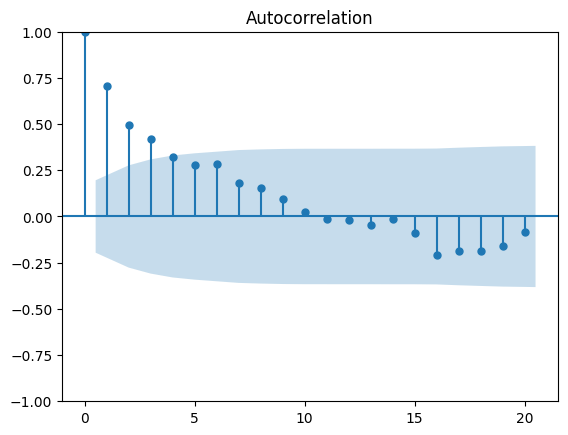

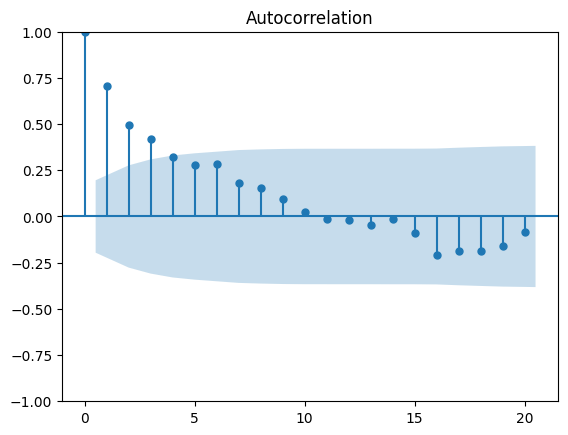

In [9]:
#AR(1) 모델 적합
model = AutoReg(df['Value'], lags=1)
results = model.fit()

#모델 정보 출력
print(results.summary())

#ACF 그래프 출력
plot_acf(df['Value'], lags=20)

In [10]:
n = 100
ma_params = [0.4, -0.2]  #이동평균 계수
residuals = np.random.normal(0, 1, n)  # 잔차 생성

#MA(2) 모델 생성
data = [0, 0]
for i in range(2, n) :
    data.append(ma_params[0] * residuals[i - 1] + ma_params[1] + residuals[i-2] + residuals[i])

df = pd.DataFrame({
    'Value' : data
})

print(df)

       Value
0   0.000000
1   0.000000
2  -0.131092
3  -0.884327
4  -0.349609
..       ...
95 -1.055665
96 -0.346636
97 -0.450196
98  1.672462
99  0.957695

[100 rows x 1 columns]


In [11]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df['Value'], order=(0,0,2))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -134.946
Date:                Wed, 31 May 2023   AIC                            277.892
Time:                        17:44:35   BIC                            288.313
Sample:                             0   HQIC                           282.109
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1171      0.218     -0.536      0.592      -0.545       0.311
ma.L1          0.4043      6.405      0.063      0.950     -12.150      12.958
ma.L2          0.9999     31.722      0.032      0.9

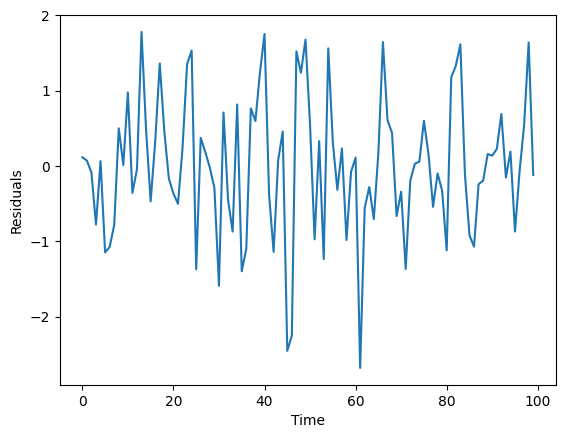

In [14]:
# 잔차 시계열 그래프 출력
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()